In [8]:
import constants # to use the constants defined in the constants.py file
import os
from google import genai # to use the GenAI API
from pydantic import BaseModel# to enforce a .JSON output schema to the model
from ultralytics import YOLO
import supervision as sv
import cv2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # For displaying images

# Step 1: Load the drone image
image = cv2.imread('Images/fire_2.png')
if image is None:
    raise FileNotFoundError("Image not found. Please provide a valid image path.")

In [13]:
image_height, image_width = image.shape[:2]

corners = {
    "top_left": (0, 0),
    "top_right": (image_width - 1, 0),
    "bottom_right": (image_width - 1, image_height - 1),
    "bottom_left": (0, image_height - 1),
}

print(corners)

{'top_left': (0, 0), 'top_right': (1791, 0), 'bottom_right': (1791, 1023), 'bottom_left': (0, 1023)}


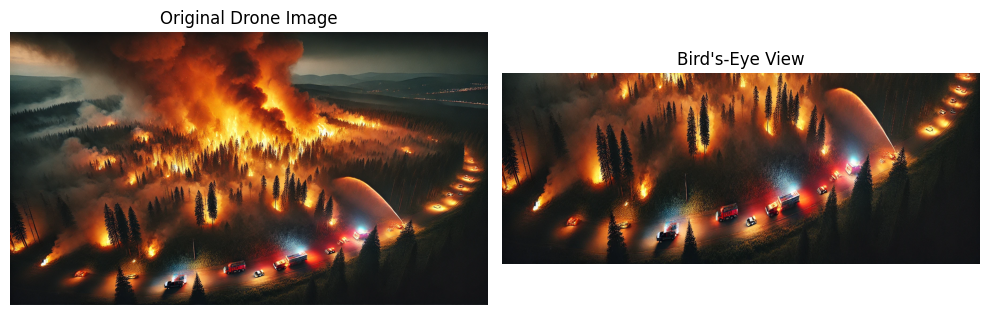

True

In [14]:


# Step 2: Define source and destination points
# Source points: Four corners of a rectangular feature in the drone image
# These are hypothetical coordinates based on a road's boundaries
src_points = np.float32([
    [0, 500],  # Top-left corner of road
    [1791, 500],  # Top-right corner
    [1791, 1023], # Bottom-right corner
    [0, 1023]     # Bottom-left corner
])

# Destination points: Corresponding corners in the BEV (a rectangle)
# Assume the road should appear as a 1000x400 rectangle in the BEV
width, height = 1000, 400
dst_points = np.float32([
    [0, 0],          # Top-left
    [width, 0],      # Top-right
    [width, height], # Bottom-right
    [0, height]      # Bottom-left
])

# Step 3: Compute homography matrix
H, _ = cv2.findHomography(src_points, dst_points)

# Step 4: Warp the image to BEV
bev_image = cv2.warpPerspective(image, H, (width, height))

# Step 5: Display original and BEV images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Drone Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Bird's-Eye View")
plt.imshow(cv2.cvtColor(bev_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: Save the BEV image
cv2.imwrite('bev_image.jpg', bev_image)